#  <span style="color:Black">Intrinsic dimension, $\mathcal{D}_{\text{int}}$, across MBL phase-transition</span>
<img src="figures/2nn_MBL_all.png"
     alt="Markdown Monster icon"
     style="float: right; margin-right: 100px;"
     width="50%"/>
This notebook contains dimension analysis of the many-body localization (MBL) transition via two-nearest-neighbours (2NN). The notebook is split into parts as delineated in the contents section below.

1. **Generating data**
1. **Weight distribution within eigenvectors**
1. **2NN**
    1. Single
    1. Many
    1. Average
    1. Scaling collapse
1. **Data from Cluster**
    1. Many
    1. Scaling collapse

In [1]:
# packages
import numpy as np  # matrix and vector operations
import matplotlib.pyplot as plt  # visualization
import fssa  # scaling collapse 
from utils_paper import *  # all things ID of MBL
from time import time

## 1. Generating data

In [2]:
Ls, num_seeds, location_raw = [6,8,10], 20, 'data/raw/'

# disorder levels
min_disorder, max_disorder, steps = 0.5, 5.5, 11
ws=np.linspace(min_disorder, max_disorder, steps)

'''to generate data: uncomment the line below 👇'''
#[buildDiagSave(L, num_seeds, ws, location = location_raw) for L in Ls]

'to generate data: uncomment the line below 👇'

## 2. EigenComponent Dominance
We may investigate whether there is a change in intrinsic dimension across the phase transition by looking at the weight distribution within eigenvectors. A decrease in intrinsic dimension is indicated by a consolidation of weight in an eigenvector.

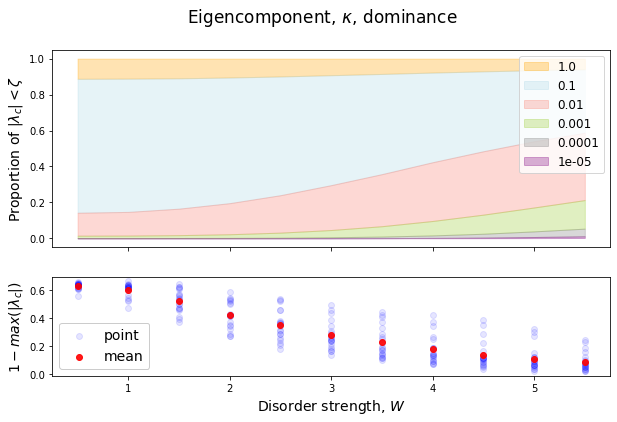

In [3]:
L = Ls[-1]
maxs, below_lims, lims = eigenC_analysis(ws, num_lims=8, num_seeds=num_seeds, L = L, location=location_raw)
eigenC_plots(below_lims, maxs.T, ws, num_seeds=num_seeds)
filename_fig = 'figures/EigCDom-L{}-seeds{}-ws{}.png'.format(L,num_seeds,len(ws))
plt.savefig(filename_fig, dpi=500, bbox_inches='tight')

## 3. 2NN
2NN is a neighbour graph algo. which determines the intrinsic dimension of a dataset -- when applied to a list of eigenvectors corresponding to one realization of a single disorder strength.

### A. Single

(38.46156524035833, 1.3257426880700094)

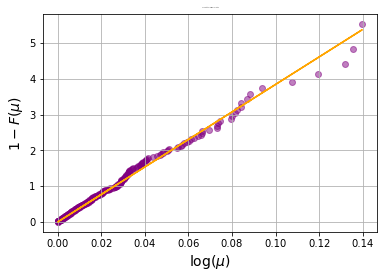

In [4]:
filename = location_raw+'eigvecs-L-{L}-W-{W}-seed-{seed}.npy'.format(L=Ls[-1], W=ws[len(ws)//2], seed=0)
eigs = np.load(filename)
slope, chi2 = nn2(eigs, plot=True)

#plt.close()
slope, chi2

### B. Many

In [5]:
filename = 'data/intrinsicDim/'+'ID_and_chi2_L[{}_{}]_ws{}_seeds{}.npz'.format(min(Ls),max(Ls), len(ws), num_seeds)
ID_and_chi2 = np.load(filename, allow_pickle=True)['ID_and_chi2'][()]

ID = np.array([[[ID_and_chi2[L][W]['ID'][seed]for L in Ls]for seed in range(num_seeds)]for W in ws]).T
chi2 = np.array([[[ID_and_chi2[L][W]['chi2'][seed]for L in Ls]for seed in range(num_seeds)]for W in ws]).T

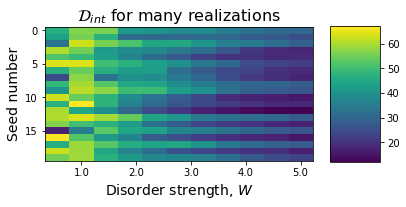

In [6]:
plt.imshow(ID[-1], cmap = 'viridis', aspect=.5*ID.shape[2]/ID.shape[1])
plt.title('$\mathcal{D}_{int}$ for many realizations', fontsize=16)
plt.ylabel('Seed number', fontsize=14)
plt.xlabel('Disorder strength, $W$', fontsize=14)
plt.xticks(np.linspace(1,len(ws)-1, 5), [ws[1+len(ws)//5*i] for i in range(5)])
plt.colorbar(aspect=2.7)
plt.show()

### C. Averaging
By performing 2NN on eigenvectors from many disorder strengths and averaging across many realization, we obtain a general trend. 

We can improve results by including a weight when averaging. The weight is determined by the quality of individual 2NN fits.

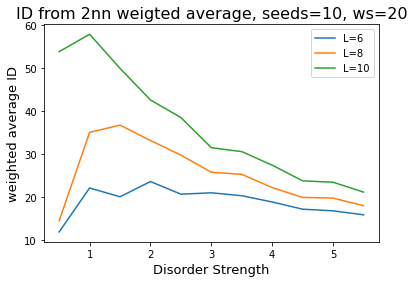

In [7]:
ID_avgs = np.average(ID, axis=1, weights=1/chi2)

for index, L in enumerate(Ls):
    plt.plot(ws,ID_avgs[index], label='L={}'.format(L))
    
plt.legend()
plt.xlabel('Disorder Strength', fontsize=13)
plt.ylabel('weighted average ID', fontsize=13)
plt.title('ID from 2nn weigted average, seeds={}, ws={}'.format(L,num_seeds,len(ws)), fontsize=16)
plt.show()

### D. Scaling collapse
To obtain the critical disorder strength, we may collapse our data from different L's
see: https://pyfssa.readthedocs.io/en/stable/tutorial.html

autoscale done
Scale data done
criticality: $W_c=$ 4.257960664362278 $\pm$ 0.7425903877774798


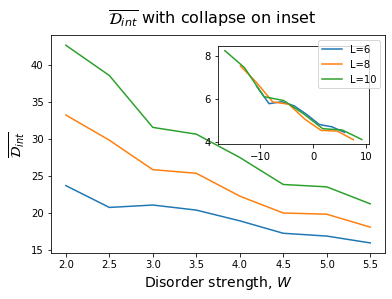

In [23]:
res = scale_collapse2(ID_avgs, ws, Ls=Ls, skip_initial=3)
print('criticality: $W_c=$ {} $\pm$ {}'.format(res['rho'], res['drho']))

## 4. Data from cluster

In [10]:
location_cluster = 'data/cluster/'

### A. Many

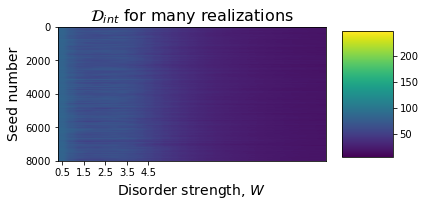

In [11]:
filename = location_cluster+'2nn-{}-combined.npy'.format(14)
data = np.load(filename)
data
plt.imshow(data,
           aspect=.5*data.shape[1]/data.shape[0],cmap = 'viridis', )

plt.colorbar(aspect=2.5)
plt.title('$\mathcal{D}_{int}$ for many realizations', fontsize=16)
plt.ylabel('Seed number', fontsize=14)
plt.xlabel('Disorder strength, $W$', fontsize=14)
plt.xticks(np.linspace(0,10,5), [ws[2*i] for i in range(5)])
plt.show()

/Users/antongolles/opt/anaconda3/lib/python3.7/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


autoscale done
Scale data done
criticality: $W_c=$ 3.668972128953338 $\pm$ nan


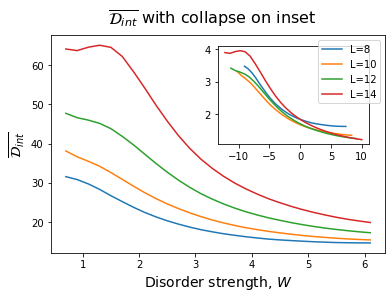

In [27]:
ws_cluster = np.linspace(0.1,6.1,31)
Ls_cluster = [8,10,12,14]
ID_mean = np.zeros((len(Ls_cluster),len(ws_cluster)))
for index, L in enumerate(Ls_cluster):
    filename = location_cluster+'2nn-{}-combined.npy'.format(L)
    data = np.load(filename)
    averaged = np.mean(data,axis=0)
    ID_mean[index] = averaged
    
skip_init = 3
res = scale_collapse2(ID_mean, ws_cluster, Ls_cluster, skip_initial=skip_init)
print('criticality: $W_c=$ {} $\pm$ {}'.format(res['rho'], res['drho']))
plt.savefig('figures/collapsed.png', dpi=420)